In [37]:
import numpy as np
import pandas as pd

In [38]:
df = pd.read_csv('HeartDisease.csv')

In [39]:
df.head(10)

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0,Hungary
1,2,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0,Hungary
2,3,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0,Hungary
3,4,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0,Hungary
4,5,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0,Hungary
5,6,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0,Hungary
6,7,32,1,2,110.0,225.0,0.0,0.0,184.0,0.0,0.0,0,Hungary
7,8,32,1,2,125.0,254.0,0.0,0.0,155.0,0.0,0.0,0,Hungary
8,9,33,1,3,120.0,298.0,0.0,0.0,185.0,0.0,0.0,0,Hungary
9,10,34,0,2,130.0,161.0,0.0,0.0,190.0,0.0,0.0,0,Hungary


In [40]:
df['num'].unique()# target label

array([0, 1])

In [41]:
df.columns

Index([u'ID', u'Age', u'Sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'num', u'Place'],
      dtype='object')

In [42]:
df.describe()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [43]:
#1. Data Cleaning 

In [44]:
df.fillna(df.mean(),inplace=True)

In [45]:
#2. Data Transformation

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Place'] = le.fit_transform(df['Place'])

In [47]:
df.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,28,1,2,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,0,0
1,2,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,0,0
2,3,29,1,2,140.0,200.048724,0.0,0.0,170.0,0.0,0.0,0,0
3,4,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,0,0
4,5,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,0,0


In [48]:
#all data converted to numeric now models can be implemented.

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

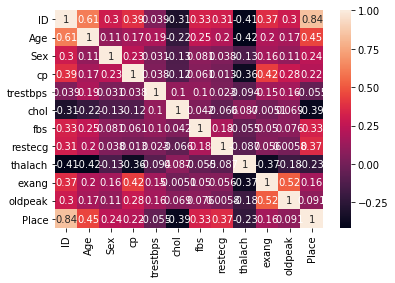

In [57]:
sns.heatmap(df.corr(),annot=True)

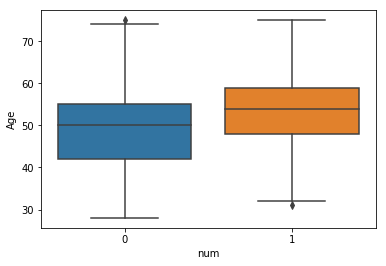

In [66]:
sns.boxplot(x=Y,y=df['Age'])

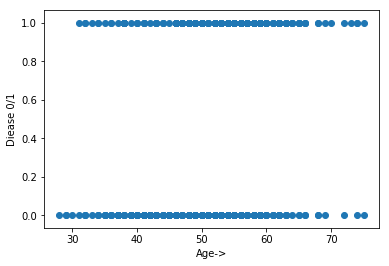

In [69]:
plt.scatter(df['Age'],Y)
plt.xlabel("Age->")
plt.ylabel("Diease 0/1")
plt.show()

In [49]:
Y = df['num']
del df['num']
X = df.iloc[:,1:]

In [50]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.28,random_state=13)

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
ypred = lr.fit(Xtrain,ytrain).predict(Xtest)

In [52]:
from sklearn.metrics import confusion_matrix as cn
cn(ytest,ypred)

array([[54, 19],
       [12, 43]])